# Résolution de la régression linéaire

On rappelle que l'on a un jeu de données avec des mesures de circonférence et de hauteur pour plusieurs arbres.

$$ \{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\} $$

Que l'on modélise par une droite :
$$
\text{hauteur} = \text{a} \cdot \text{circonférence} + \text{b}
$$

Pour trouver la meilleure droite, on cherche à minimiser **la fonction d'erreur J**, ici on choisit la **Mean Squared Error (MSE)** qui mesure l'erreur moyenne entre les vraies valeurs yᵢ et les valeurs prédites ŷᵢ par le modèle en pénalisant les grandes erreurs (grâce au carré).
$$
\text{J(a, b)} = \frac{1}{n} \sum_{
i=1}^{n} (y_i - \hat{y}_i)^2
$$

c'est-à-dire : 

$$
\text{MSE(a, b)} = \frac{1}{n} \sum_{
i=1}^{n} (y_i - (a \cdot x_i + b))^2
$$

Notre objectif est donc de trouver les paramètres a et b qui minimisent la MSE.

$$\min_{a, b} \text{MSE}(a, b)$$

# Quelle forme a cette fonction de coût ?

In [13]:
import numpy as np 
import matplotlib.pyplot as plt

On génère le même jeu de données. 

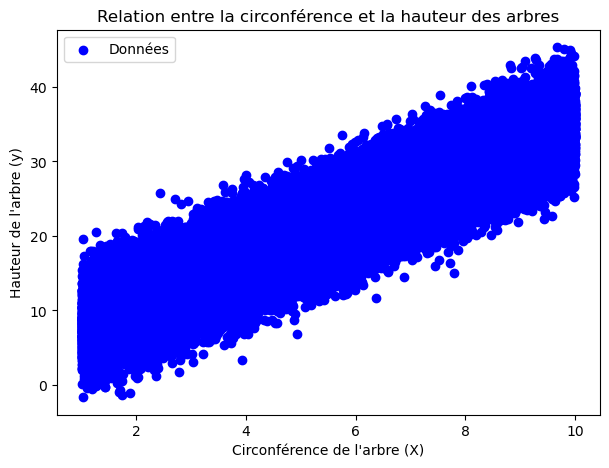

In [14]:
# pour être reproductible, on fixe la seed
np.random.seed(42)

# génération de données synthétiques
n = 100_000
X = np.linspace(1, 10, n).reshape(-1, 1)
true_slope, true_intercept = 3, 5

# on ajoute un bruit gaussien aux données
# ce bruit correspond à des variations aléatoires (arbres d'essences différentes,
# erreurs de mesure, etc.  )
noise = np.random.normal(0, 3, size=n)
y = true_slope * X.flatten() + true_intercept + noise

# Visualisation des données
plt.figure(figsize=(7, 5))
plt.scatter(X, y, color="blue", label="Données")
plt.xlabel("Circonférence de l'arbre (X)")
plt.ylabel("Hauteur de l'arbre (y)")
plt.title("Relation entre la circonférence et la hauteur des arbres")
plt.legend()
plt.show()

Et on regarde la forme de la fonction de coût en faisant varier les paramètres a et b.

In [ ]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# grille de paramètres
slope_vals = np.linspace(-2, 6, 100)
intercept_vals = np.linspace(-10, 20, 100)
# meshgrid pour avoir tous les couples (slope, intercept)
S, I = np.meshgrid(slope_vals, intercept_vals)

# Calcul vectorié du MSE pour chaque couple (slope, intercept) ---
MSE_vals = np.sqrt(
    np.mean(
        (
            y.reshape(1, 1, -1)
            - (S[:, :, np.newaxis] * X.flatten() + I[:, :, np.newaxis])
        )
        ** 2,
        axis=2,
    )
)

from plotly import graph_objects as go

fig = go.Figure(data=[go.Surface(z=MSE_vals, x=slope_vals, y=intercept_vals)])
fig.update_layout(
    title="Fonction de coût (MSE) en fonction des paramètres (a, b)",
    scene=dict(
        xaxis_title="Pente (a)",
        yaxis_title="Ordonnée à l'origine (b)",
        zaxis_title="MSE",
    ),
    autosize=False,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90),
)
fig.show()

# 1. Résolution analytique

Un peu de maths, on peut réécrire la MSE de la façon suivante :
$$
\text{MSE(a, b)} = \sqrt{\frac{1}{n}
\sum_{i=1}^{n} (y_i - (a \cdot x_i + b))^2}
$$  

C'est donc une fonction de deux variables a et b on va prouver : 

1. Que cette fonction est convexe (sa matrice hessienne est semie-définie positive)
2. Donc qu'elle a un minimum global
3. On peut trouver ce minimum en résolvant un système d'équations linéaires

En notant : Sxx = Σ(xᵢ - x̄)², Syy = Σ(yᵢ - ȳ)², Sxy = Σ(xᵢ - x̄)(yᵢ - ȳ)

On trouve : 

<p align="center">
  <img src="./img/valeur de a.png" alt="plot" width="50%"/>
</p>

<p align="center">
  <img src="./img/valeur de b.png" alt="plot" width="50%"/>
</p>



# 2. Résolution algébrique

On note X la matrice des entrées augmentée d'une colonne de 1 (pour le biais), Y le vecteur des sorties et beta le vecteur des paramètres (a, b).

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
$$  

$$
Y = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$

$$
\beta = \begin{bmatrix}
b \\
a
\end{bmatrix}
$$

On a : 
$$
\hat{Y} = X \cdot \beta
$$

Si on note E = Y - Ŷ, on a :
$$
\text{MSE}(\beta) = \frac{1}{n} E^
T \cdot E
$$

On peut alors prouver que, si X est injective, le meilleur beta qui minimise la MSE est donné par la formule des moindres carrés ordinaires (OLS) :
$$
\beta = (X^T \cdot X)^{-1} \cdot X
^T \cdot Y
$$

<p align="center">
  <img src="./img/proj_ortho.png" alt="plot" width="50%"/>
</p>

In [ ]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

# ---------------------------
# Données factices en 3D
# ---------------------------
np.random.seed(0)
n = 3  # 3 points pour rester en 3D
X = np.column_stack([np.ones(n), np.linspace(0, 2, n)])  # intercept + feature
true_beta = np.array([1.5, 2.0])
y = X @ true_beta + np.random.normal(0, 0.2, n)

# ---------------------------
# Sliders
# ---------------------------
b0_slider = widgets.FloatSlider(value=0, min=-3, max=3, step=0.1, description='β0:')
b1_slider = widgets.FloatSlider(value=0, min=-3, max=3, step=0.1, description='β1:')

output = widgets.Output()
display(b0_slider, b1_slider, output)

# ---------------------------
# Fonction de mise à jour
# ---------------------------
def update_plot(change=None):
    with output:
        output.clear_output(wait=True)

        beta = np.array([b0_slider.value, b1_slider.value])
        y_hat = X @ beta
        residu = y - y_hat

        fig = go.Figure()

        # Vecteur y (bleu)
        fig.add_trace(go.Scatter3d(
            x=[0, y[0]], y=[0, y[1]], z=[0, y[2]],
            mode="lines+markers",
            line=dict(color="blue", width=6),
            marker=dict(size=4),
            name="y"
        ))

        # Vecteur Xβ (rouge)
        fig.add_trace(go.Scatter3d(
            x=[0, y_hat[0]], y=[0, y_hat[1]], z=[0, y_hat[2]],
            mode="lines+markers",
            line=dict(color="red", width=6),
            marker=dict(size=4),
            name="Xβ"
        ))

        # Résidu (vert) attaché au bout de Xβ
        fig.add_trace(go.Scatter3d(
            x=[y_hat[0], y[0]], y=[y_hat[1], y[1]], z=[y_hat[2], y[2]],
            mode="lines+markers",
            line=dict(color="green", width=6, dash="dot"),
            marker=dict(size=4),
            name="Résidu"
        ))

        fig.update_layout(
            scene=dict(
                xaxis=dict(range=[-5, 5]),
                yaxis=dict(range=[-5, 5]),
                zaxis=dict(range=[-5, 5]),
                xaxis_title="Dim 1",
                yaxis_title="Dim 2",
                zaxis_title="Dim 3",
            ),
            title="Décomposition : y = Xβ + résidu",
            showlegend=True,
            margin=dict(l=0, r=0, b=0, t=40)
        )

        fig.show()

# ---------------------------
# Connect sliders
# ---------------------------
b0_slider.observe(update_plot, names='value')
b1_slider.observe(update_plot, names='value')

# Affichage initial
update_plot()


FloatSlider(value=0.0, description='β0:', max=3.0, min=-3.0)

FloatSlider(value=0.0, description='β1:', max=3.0, min=-3.0)

Output()

Question : implémenter les deux méthodes pour trouver a et b.

In [ ]:
%%timeit
# Ajout de la colonne de 1 pour l'intercept
X_mat = np.hstack([np.ones((n,1)), X])
beta = np.linalg.inv(X_mat.T @ X_mat) @ (X_mat.T @ y)
b_matrix, a_matrix = beta[0], beta[1]

381 μs ± 26.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%%timeit
S_x = X.sum()
S_y = y.sum()
S_xx = (X**2).sum()
S_xy = (X.flatten() * y).sum()

a_classic = (S_xy - S_x*S_y/n) / (S_xx - S_x**2/n)
b_classic = y.mean() - a_classic*X.mean()

65.9 μs ± 1.58 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%%timeit
S_x = X.sum()
S_y = y.sum()
S_xx = (X**2).sum()
S_xy = (X.flatten() * y).sum()

a_classic = (S_xy - S_x*S_y/n) / (S_xx - S_x**2/n)
b_classic = y.mean() - a_classic*X.mean()

65.9 μs ± 1.58 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
